# Búsquedas por Similitud en Iris

In [73]:
import numpy as np
import pandas as pd
import heapq
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv("iris.data", header=None)
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
datatrain = dataset.iloc[ : , :4]
datatrain.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

### P1- Búsqueda por Rango

### a) Análisis de la distribución de la distancia (con 5000 pares)

Min: 0.0
Max: 7.059036761485238
Mean: 2.516649609561165
Std: 1.629222741891248


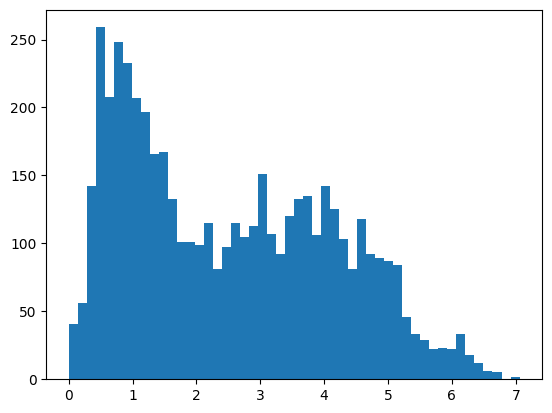

0th percentile: 0.0
25th percentile: 1.0295630140987
50th percentile: 2.2912878474779204
75th percentile: 3.8483762809787714
100th percentile: 7.059036761485238


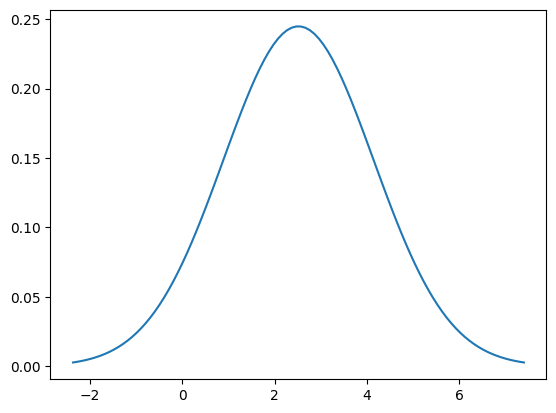

In [81]:
# Analisis de la distribucion de la distacia con 5000 pares
distances = []
for i in range(5000):
    x = np.random.randint(0, 150)
    y = np.random.randint(0, 150)
    distances.append(euclidean_distance(datatrain.iloc[x], datatrain.iloc[y]))

distances = np.array(distances)
print("Min:", np.min(distances))
print("Max:", np.max(distances))
print("Mean:", np.mean(distances))
print("Std:", np.std(distances))

# draw the histogram
plt.hist(distances, bins=50)
plt.show()

# draw percentiles of the distances in the histogram
percentiles = [0, 25, 50, 75, 100]
for p in percentiles:
    print("{}th percentile: {}".format(p, np.percentile(distances, p)))



### b) Calculo de la búsqueda por rango

In [62]:
def rangeSearch(collection, query, r):
    #return a touple with id and distance
      result = []
      for i in range(len(collection)):
        distance = euclidean_distance(collection.iloc[i], query)
        if distance <= r:
            result.append((i, distance))
      return result


In [77]:
# calcular la busqueda por rango

#TODO: reemplace por sus radios obtenidos del analisis de la distribucion de la distancia
radios_obtenidos = [0.8, 1.5, 2.6] 

for ind_q in [15, 82, 121]: 
    for r in radios_obtenidos:    
        query = datatrain.iloc[ind_q]
        dataT = datatrain.drop([ind_q], axis=0, inplace=False)
        result = rangeSearch(dataT, query, r)
        pr = 0
        for (id, d) in result:
            if dataset.iloc[id, 4] == dataset.iloc[ind_q, 4]:
                pr += 1
        print("Query"+str(ind_q), ": radio " +str(r), ": precision ", pr / len(result))


Query15 : radio 0.8 : precision  1.0
Query15 : radio 1.5 : precision  1.0
Query15 : radio 2.6 : precision  0.98
Query82 : radio 0.8 : precision  1.0
Query82 : radio 1.5 : precision  0.7796610169491526
Query82 : radio 2.6 : precision  0.5376344086021505
Query121 : radio 0.8 : precision  0.6666666666666666
Query121 : radio 1.5 : precision  0.4473684210526316
Query121 : radio 2.6 : precision  0.46808510638297873


### Búsqueda KNN

In [78]:
def knnSearch(collection, query, k):
    heap = []
    for i in range(len(collection)):
        distance = euclidean_distance(collection.iloc[i], query)
        heapq.heappush(heap, (-distance, i))
        if len(heap) > k:
            heapq.heappop(heap)
    return [(i, -d) for d, i in heap]

In [79]:
# calcular la busqueda por rango
for ind_q in [15, 82, 121]: 
    for k in [2, 4, 8, 16, 32]:    
        query = datatrain.iloc[ind_q]
        dataT = datatrain.drop([ind_q], axis=0, inplace=False)
        result = knnSearch(dataT, query, k)
        pr = 0
        for (id, d) in result:
            if dataset.iloc[id, 4] == dataset.iloc[ind_q, 4]:
                pr += 1
        print("Query"+str(ind_q), ": k " +str(k), ": precision ", pr / len(result))

Query15 : k 2 : precision  1.0
Query15 : k 4 : precision  1.0
Query15 : k 8 : precision  1.0
Query15 : k 16 : precision  1.0
Query15 : k 32 : precision  1.0
Query82 : k 2 : precision  1.0
Query82 : k 4 : precision  1.0
Query82 : k 8 : precision  1.0
Query82 : k 16 : precision  1.0
Query82 : k 32 : precision  1.0
Query121 : k 2 : precision  1.0
Query121 : k 4 : precision  1.0
Query121 : k 8 : precision  0.875
Query121 : k 16 : precision  0.625
Query121 : k 32 : precision  0.5
